The Behavioral Risk Factor Surveillance System (BRFSS) is a collaborative project between all the states
in the United States and participating US territories and the Centers for Disease Control and Prevention
(CDC). The BRFSS is administered and supported by CDC's Population Health Surveillance Branch, under
the Division of Population Health at CDC’s National Center for Chronic Disease Prevention and Health
Promotion. The BRFSS is a system of ongoing health-related telephone surveys that collect data on
health-related risk behaviors, chronic health conditions, health-care access, and use of preventive
services from the noninstitutionalized adult population (≥ 18 years) residing in the United States and
participating areas.

The BRFSS was initiated in 1984, with 15 states collecting surveillance data on risk behaviors through
monthly telephone interviews. Over time, the number of states participating in the survey increased;
BRFSS now collects data in all 50 states as well as the District of Columbia and participating US
territories. During 2023, 48 states, the District of Columbia, Guam, Puerto Rico, and the US Virgin Islands
collected BRFSS data. Kentucky and Pennsylvania were unable to collect enough data to meet the
minimum requirements to be included in the 2023 public data set.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
import os
data_folder = "/content/drive/My Drive/data"

In [ ]:
import pandas as pd
#df = pd.read_stata("/content/drive/Shareddrives/CSE180H/ BRFSS_surveys/BRFSS2023.dta")
#df.to_csv("/content/drive/Shareddrives/CSE180H/ BRFSS_surveys/BRFSS2023.csv", index=False)

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/CSE180H/ BRFSS_surveys/BRFSS2023.csv')

In [ ]:
val = "CRGVALZD"
val.lower()

'crgvalzd'

# Related Columns to Alzheimer's

In [ ]:
# Select specific columns
# 1 - Male, 2 - Female
#column_names = df.columns.tolist()
#print(column_names)

selected_columns = ['landsex2', 'rrclass3', 'crgvalzd']
df_selected = df[selected_columns].dropna()

# changing column name to appropriate names
df_renamed = df_selected.rename(columns={
    'landsex2': 'Sex',
    'rrclass3': "Race",
    'crgvalzd' : "Alzheimer"
})

df_filtered = df_renamed[df_renamed['Alzheimer'].isin([1, 2])]
df_filtered

,Sex,Race,Alzheimer
21938,2.0,1.0,2.0
21940,1.0,1.0,2.0
21948,1.0,1.0,1.0
21952,1.0,1.0,1.0
21958,2.0,1.0,2.0
...,...,...,...
136823,2.0,2.0,2.0
136824,2.0,2.0,2.0
136838,2.0,1.0,2.0
136839,2.0,2.0,2.0


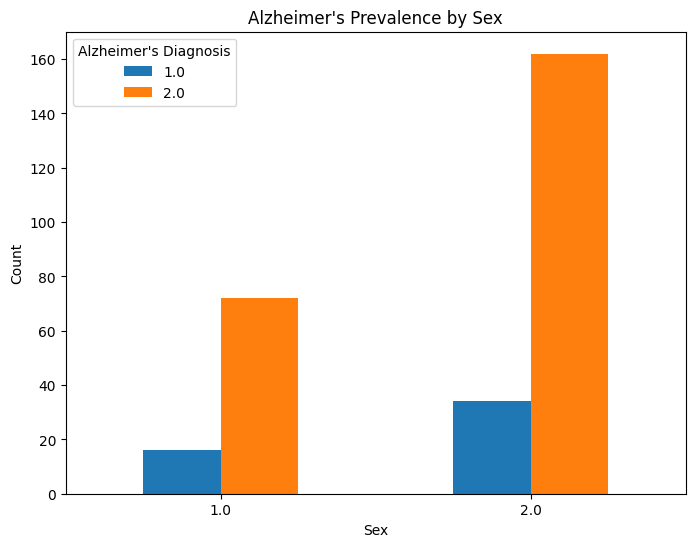

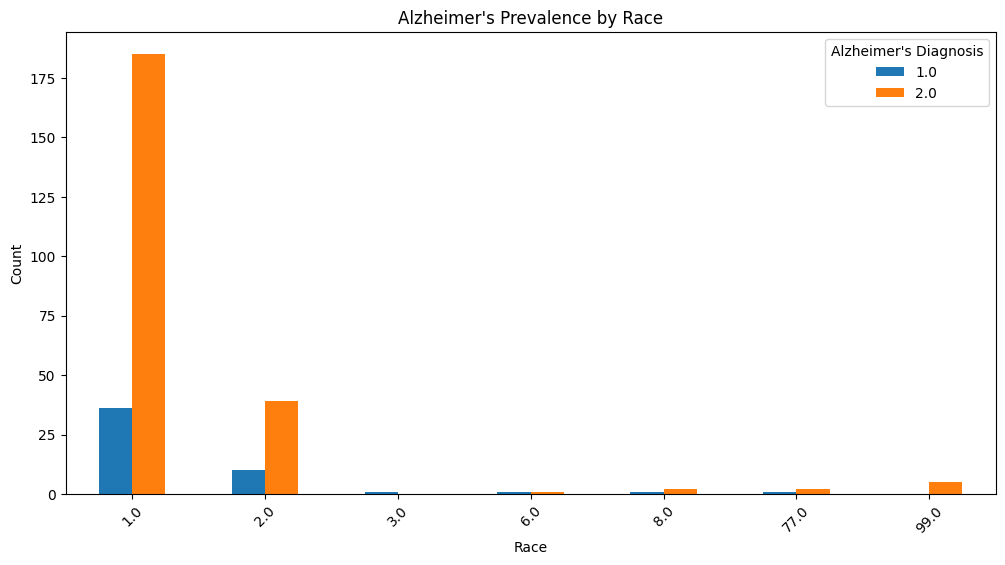

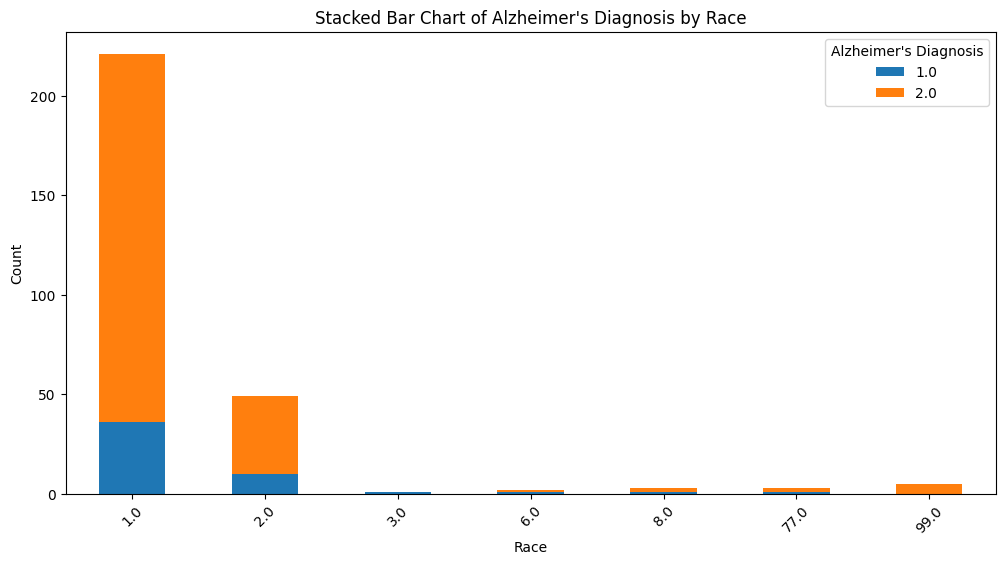

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences for Sex and Alzheimer
sex_counts = df_filtered.groupby(["Sex", "Alzheimer"]).size().unstack()

# Bar Chart: Alzheimer's prevalence by Sex
sex_counts.plot(kind="bar", figsize=(8, 6))
plt.title("Alzheimer's Prevalence by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Alzheimer's Diagnosis")
plt.xticks(rotation=0)
plt.show()

# Count occurrences for Race and Alzheimer
race_counts = df_filtered.groupby(["Race", "Alzheimer"]).size().unstack()

# Bar Chart: Alzheimer's prevalence by Race
race_counts.plot(kind="bar", figsize=(12, 6))
plt.title("Alzheimer's Prevalence by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="Alzheimer's Diagnosis")
plt.xticks(rotation=45)
plt.show()

# Stacked Bar Chart: Alzheimer's distribution across Race
race_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Stacked Bar Chart of Alzheimer's Diagnosis by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="Alzheimer's Diagnosis")
plt.xticks(rotation=45)
plt.show()
